# Lecture 1: Numerical Differentiation

### Example Problems

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Example:**
Find an approximate solution to the first differential of $f(x)=e^{-x}\sin (x)$ in the range $[0,9]$ using the $O(h^{2})$ approximation.

```python
CREATE list of step sizes (h)
CREATE variable (x) for every step size (h)
CREATE f(x) for every variable (x)
CREATE function to find numerical solution to f'(x)
    INPUT each f(x) into this function
    SAVE each f'(x) as a variable
CREATE variable for analytical solution to f'(x)
PLOT numerical and analytical solutions to f'(x)
    FOR each subplot in mosaic
        FORMAT all numerical f'(x) graphs
        FORMAT analytical f'(x) graph
        FORMAT f(x) graph
```

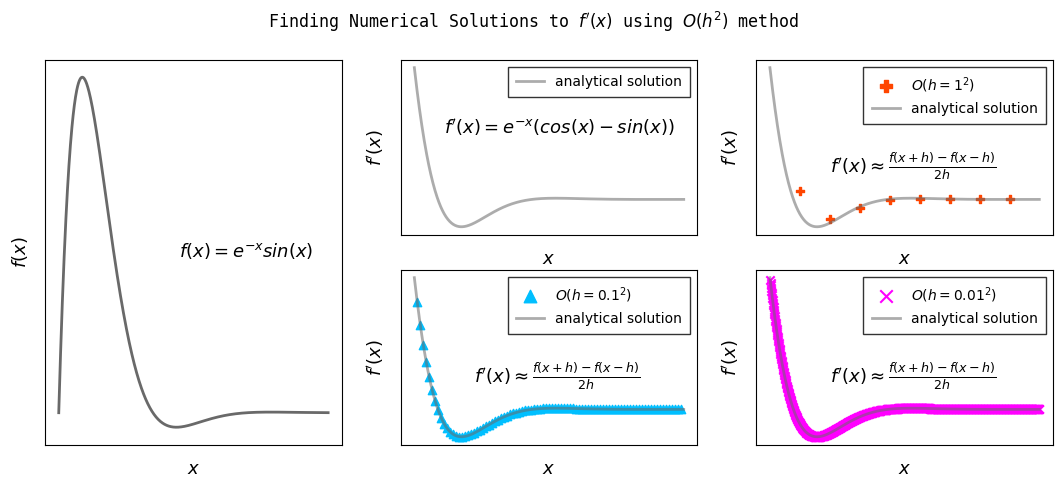

In [4]:
# create list of step sizes (h)
h = [1, 0.1, 0.01]

# create variables (x)
x = np.arange(0, 9, 1e-2) # for f(x) and analytical solution to f'(x)
x0 = np.arange(0, 9+h[0], h[0]) # for numerical solution(s) to f'(x)
x1 = np.arange(0, 9+h[1], h[1])
x2 = np.arange(0, 9+h[2], h[2])

def f(x):
    # returns a function f(x)
    return np.exp(-x) * np.sin(x)

f0, f1, f2 = f(x0), f(x1), f(x2)

def fd(f,h):
    # find numerical solution to f'(x) given f(x) and h
    return (f[2:] - f[:-2]) / (2*h), h

# analytical solution for f'(x)
fa = np.exp(-x) * (np.cos(x) - np.sin(x))

# numerical solution for f'(x)
fd0, h0 = fd(f0, h[0])
fd1, h1 = fd(f1, h[1])
fd2, h2 = fd(f2, h[2])

# set figure layout
fig, ax = plt.subplot_mosaic([['f','a','b'],
                              ['f','c','d']],
                              figsize=(13,5))

# plot f(x)
ax['f'].plot(x, f(x), 'dimgrey', lw=2, label='f(x)') # plot f(x)

# plot solutions to f'(x)
ax['b'].scatter(x0[1:-1], fd0, color='orangered', marker='P', label=f'$O(h={h0}^2)$') # plot numerical solution(s)
ax['c'].scatter(x1[1:-1], fd1, color='deepskyblue', marker='^', label=f'$O(h={h1}^2)$')
ax['d'].scatter(x2[1:-1], fd2, color='fuchsia', marker='x', label=f'$O(h={h2}^2)$')

# format graph
font = {'family':'monospace', 'color':'black', 'size':13} # set font dictionary
fig.suptitle("Finding Numerical Solutions to $f'(x)$ using $O(h^2)$ method", fontdict=font)

for label, axs in ax.items():
    axs.set_xticklabels([]); axs.set_yticklabels([]); # hide labels for all graphs
    axs.tick_params(left = False, bottom = False)

    if (label=='f'):
        # format f(x) graph
        axs.text(4, .15, r"$f(x) = e^{-x}sin(x)$", fontdict=font)
        axs.set_xlabel(xlabel='$x$', fontdict=font), axs.set_ylabel("$f(x)$", fontdict=font); # set labels
    else:
        if (label=='a'):
            # format top left 4x4 graph
            axs.text(1, .5, r"$f'(x) = e^{-x} (cos(x) - sin(x))$", fontdict=font)
        else:
            # format both bottom 4x4 graph
            axs.text(2, .2, r"$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h} $", fontdict=font)
        
        # format all 4x4 graphs
        axs.set_xlabel(xlabel='$x$', fontdict=font) # set labels
        axs.set_ylabel("$f'(x)$", fontdict=font)
        axs.plot(x, fa, 'dimgrey', lw=2, alpha=.55, label='analytical solution') # overlay analytical solution
        axs.legend(loc='best', edgecolor='black', fancybox=False, markerscale=1.5, borderpad=.6)

Important to note that these numerical solutions only approximate the differentials of the sample *data points* - it does not give an approximate for the *equation* of the analytical function $f'(x)$. Also, this particular method exludes the first and last data points i.e. there are no $f'(x)$ approximates for $f(x_0)$ and $f(x_n)$ where $n$ is the number of sample data points.

We can check that the function of our approximate differential is of the form $O(h^2)$ i.e. it's absolute error is proportional to the function in the $\frac {h^2}{6} f^{(3)}(\xi)$ term of the taylor series derived approximations. It's also the same method if we wanted to check if our approximation equation is of the form $O(h)$ or $O(h^4)$ etc.

The method is to obtain the error of a single sample point $(x_i,f(x_i))$ along the interval of the problem $[0,9]$ and observe how the size of the absolute error varies with step size $h$. At this point, we are only considering the truncation error ($E_{trunc}$), we'll introduce other sources later, but for now, we assume the absolute error ($E_{abs}$) is comprised only of $E_{trunc}$, i.e. comprised only of the $\frac {h^2}{6} f^{(3)}(\xi)$ term - from Taylor expansion.

```python
FIND the error of a single point f'(x)
    CREATE variable for a range of intervals (h)
    CREATE variable for a single point (x)
    CREATE variable for analytical solution to f'(x)
    CREATE variable for numerical solution to f'(x)
        INPUT x +/- h into function f(x)
    CREATE variable for absolute error
PLOT h vs absolute error on log scale
PLOT O(h^2) on log scale
```

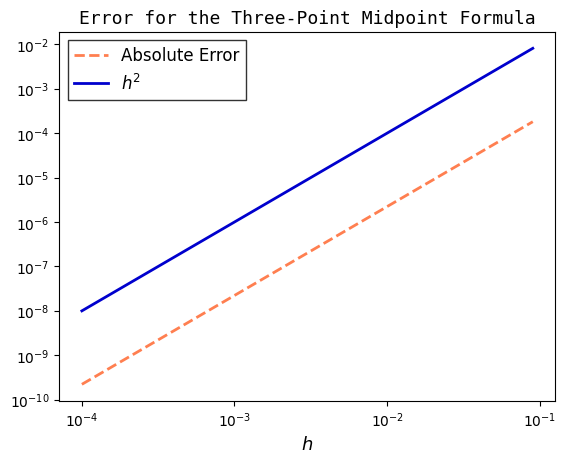

In [6]:
# create range of step sizes (h)
h = np.arange(1e-4, 1e-1, 1e-2)

# pick an arbitrary point (x)
point = 2

# find analytical solution to f'(x)
fa = np.exp(-point) * (np.cos(point) - np.sin(point)) # f'(x) of f(x) = np.exp(-x) * np.sin(x)

# find numerical solution to f'(x)
fn = (f(point + h) - f(point - h)) / (2*h) # numerical method

# find absolute error of point f'(x)
error = np.abs(fa - fn)

# plot errors on graph
plt.figure()
plt.loglog(h, error, linestyle='--', color='coral', lw=2, label='Absolute Error') # error for numerical method
plt.loglog(h, h**2, color='mediumblue', lw=2, label='$h^2$') # h^2

# format graph
plt.xlabel('$h$', fontdict=font)
plt.title('Error for the Three-Point Midpoint Formula', fontdict=font)
plt.legend(loc='best', fontsize=12, edgecolor='black', fancybox=False)
plt.tick_params(axis='x', which='minor', bottom=False)
plt.tick_params(axis='y', which='minor', left=False)

We can see how $O(h)$, $O(h^2)$ and $O(h^4)$ errors compare to each other.

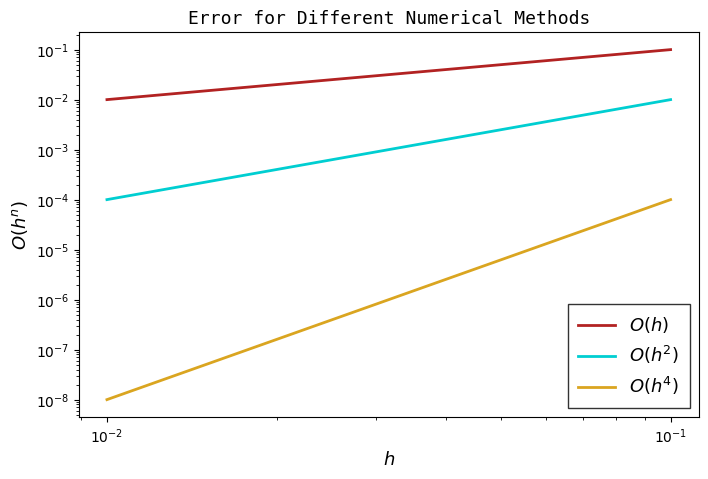

In [23]:
plt.figure(figsize=(8,5))

h = np.arange(1e-2, 1e-1, 1e-3)

plt.loglog(h, h, label='$O(h)$', lw=2, color='firebrick')
plt.loglog(h, h**2, label='$O(h^2)$', lw=2, color='darkturquoise')
plt.loglog(h, h**4, label='$O(h^4)$', lw=2, color='goldenrod')
plt.title('Error for Different Numerical Methods', fontdict=font)
plt.xlabel('$h$', fontdict=font); plt.ylabel('$O(h^{n})$', fontdict=font);
plt.legend(loc='best', fontsize=13, edgecolor='k', fancybox=False, borderpad=.6)

### Finding the optimal step size ($h_{opt}$)

Now we consider that the absolute error $E_{abs}$ with two components, the rounding error ($E_{round}$) as well as the truncation error ($E_{trunc}$).

$$
f^{(1)}(x) = \frac{y_{+1}-y_{-1}}{2h} + \frac{e_{+1}-e_{-1}}{2h} - \frac{h^2}{6}f^{(3)}(\xi^*)
$$

- **Truncation error ($E_{trunc}$)** : - $\frac{h^2}{6}f^{(3)}(\xi^*)$
- **Rounding error ($E_{round}$)** : $\frac{e_{+1}-e_{-1}}{2h}$

We can see that one term $E_{round}$ is proportional to $h^{-1}$ and the other term $E_{trunc}$ is proportional to $h^2$, so as $h$ increases then rounding error term gets smaller and the truncation error term gets bigger at the same time. We can see in the graph below that there's an optimum $h_{opt}$ where the addition of these two dissenting terms ($E_{tot}$) has a minimum.

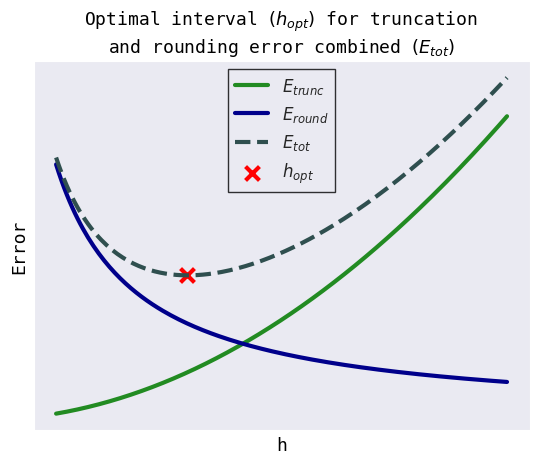

In [67]:
# create range of step sizes (h)
h = np.arange(0.3, 2, 0.01)

# create truncation, rounding and total error
trunc = h**2 # as functions of (h)
round = 1/h
total = trunc + round

# find optimal step size (h) of total error
h_opt = (h[np.where(total==total.min())], total[np.where(total==total.min())])

# plot all three errors
plt.plot(h, trunc, color='forestgreen', lw=3, label='$E_{trunc}$')
plt.plot(h, round, color='darkblue', lw=3, label='$E_{round}$')
plt.plot(h, total, color='darkslategrey', linestyle='--', lw=3, label='$E_{tot}$')
plt.scatter(h_opt[0], h_opt[1], color='red', lw=3, s=100, marker='x', label='$h_{opt}$') # plot optimal interval size (h)

# format graph
plt.title('Optimal interval $(h_{opt})$ for truncation \nand rounding error combined $(E_{tot})$', fontdict=font)
plt.xlabel('h', fontdict=font), plt.ylabel('Error', fontdict=font)
plt.legend(loc='best', fontsize=12, fancybox=False, edgecolor='k')
plt.xticks([]), plt.yticks([]);

Using the triangle inequality 

$$
|E_{tot}| = |E_{round} + E_{trunc}|
$$

$$
|E_{round} + E_{trunc}| \leq |E_{round}| + |E_{trunc}|
$$

and then bounding both $|E_{round}|$ and $|E_{trunc}|$. We want the best step size $h$ for the worst case scenario, so we limit each error to it's max possible value and see the lowest $h$ that it yields. Let's call the maximum value that $f^{(3)(\xi)}$ can take $M$, also the maximum of the rounding error $|e_{\pm 1}| \leq 0.5 \times 10^{-N}$ where $N$ is the number of digits to which we want to round our decimals. Note that rounding errors are quasi random, so you can't know the sign of $e_{\pm1}$ (we assume both are positive and add them both).

$$
|E_{trunc}| = \left\lvert \frac{h^2}{6}f^{(3)}(\xi^*) \right\rvert \leq \frac{h^2}{6}M
$$

$$
|E_{round}| = \left\lvert \frac{e_{+1}-e_{-1}}{2h} \right\rvert \leq \frac{10^{-N}}{h}
$$

Max values of $E_{round}$ and $E_{trunc}$ is then $\frac{10^{-N}}{h}$ and $\frac{h^2}{6}M$. We substitute both into $|E_{tot}| = |E_{round} + E_{trunc}| \leq |E_{round}| + |E_{trunc}|$ and re-arrange for $h$ then we get

$$
h_{opt} = \biggl( \frac{3 \times 10^{-N}}{M} \biggr)^ {\frac{1}{3}}
$$

an equation for $h_{opt}$ with bounds applied.


### Example Problems
*Back to example problems again...*

**Example:** Given a function $|f^{(3)}(\xi^*)| = sin(\xi) \leq M = 1$ and number of decimal digits $N=6$. Put this into the equation above for $h_{opt}$ and we get $h_{opt} = 0.0144$ or $h=0.01$. We can use python to confirm this formula is a valid approximation for the optimal step size.

We introduce the $E_{trunc}$ comes from using the numerical approximation in `fn` and the $E_{round}$ comes from using `round`, so that our $E_{abs}$ is now made up of the rounding error in addition to the truncation error.

```python
VERIFY the equation gives the optimal step size (h)
    CREATE variable for range of test intervals (h)
    CREATE variable (x) to put optimal (h) we want to confirm
    SELECT a single point (x) to find error of (0.8)
    CREATE variable for numerical solution to f'(0.8)
        INPUT range of step sizes (h) and f(x) into variable
        ROUND each f(x) when input into numerical solution
    CREATE variable for analytical solution
    PLOT absolute error(s) of numerical solution to f'(0.8) for each (h)
    PLOT vertical line for optimal (h)
CONFIRM optimal (h) sits at a min point
```

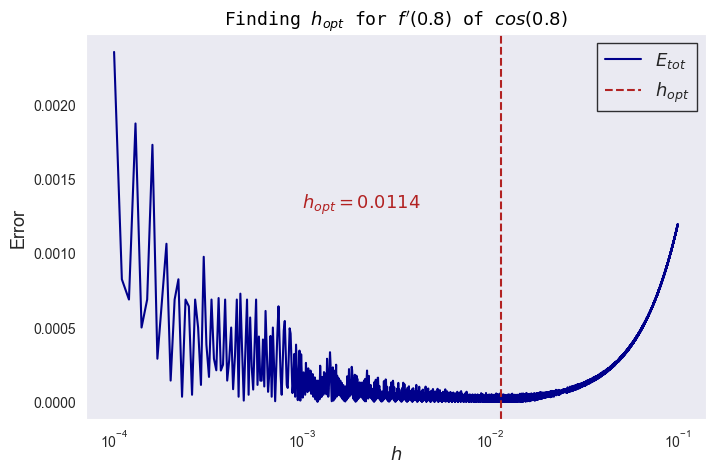

In [72]:
# create range of test interval sizes (h)
h = np.arange(1e-4, 1e-1, 1e-5)

x = 0.0114 # optimal (h) to check

# find solutions to f'(x) of single test point
fn = (np.round(np.cos(0.8+h), 6) - np.round(np.cos(0.8-h), 6)) / (2*h) # numerical solution
fa = -np.sin(0.8) # analytical solution

# find absolute error for single test point for each (h)
err = np.abs(fa - fn)

# plot graph
plt.figure(figsize=(8, 5))     
plt.semilogx(h, err, color='darkblue', label='$E_{tot}$') # absolute error of test point f'(0.8)
p = plt.axvline(x, color='firebrick', linestyle='--', label='$h_{opt}$') # optimal (h)

# format graph
plt.title("Finding $h_{opt}$ for $f'(0.8)$ of $cos(0.8)$", fontdict=font)
plt.xlabel('$h$', labelpad=-4, fontsize=13), plt.ylabel('Error', fontsize=13);
plt.text(1e-3, .0013, r"$h_{opt}=%.4f$" % x, fontdict=font, color=p.get_color())
plt.legend(fontsize=13, fancybox=False, edgecolor='k')
plt.tick_params(axis='x', which='minor', bottom=False)

**Example:** Apply numerical differential methods to find the boundaries of an image.

```python
APPLY numerical differentials to 2D image
    READ in RGB image with imread() (3 color channels)
    CONVERT rgb image to grayscale image => (1 color channel)
    CREATE a function to find the gradient of this color channel
        CREATE variable for gradient of each pixel in image
    PLOT gradient values using imshow
        EACH pixel of 2D image corresponds to a color
SHOW image boundaries
```

In [8]:
from skimage.color import rgb2gray

In [19]:
# import image
Img = plt.imread(r"C:\Users\Tricia\Downloads\flamingo.jpg") # <= insert image path here 
# convert image to greyscale 
Im = rgb2gray(Img)

# create function to find gradient of each image pixel 
def im_grad(I):
    # takes in 2D image with single color channel 
    # finds gradient along each x and y direction using O(h^2) method
    # returns magnitude gradient
    grad_x = ((I[2::,1:-1] - I[0:-2,1:-1]) / 2) # h=1 pixels
    grad_y = ((I[1:-1, 2::] - I[1:-1,0:-2]) / 2) 
    Mag = np.sqrt(grad_x**2 + grad_y**2)
    return Mag

# find gradient of import image
Mag = im_grad(Im)
# pixels where value changes a lot (high gradient) correspond to light color
# pixels where values don't change much (low gradient) corresponds to dark color
Mag_th = Mag > 0.05 # set magnitude threshold

print(np.shape(Im))
print(np.shape(Img))

print(Img[0,0])

(427, 734)
(427, 734, 3)
[23 24 26]


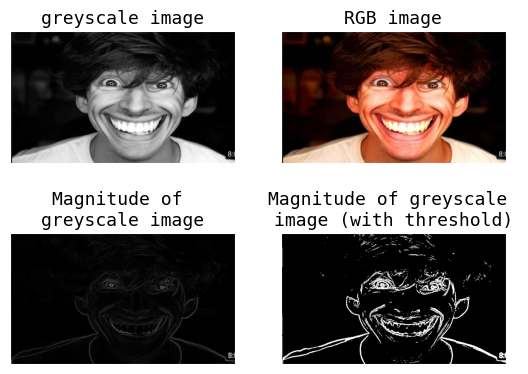

In [92]:
# plot graph
fig, axs = plt.subplots(2,2)

axs[0,0].imshow(Im, cmap='gray', label='greyscale image')
axs[0,1].imshow(Img, label='original image(rgb color channel)')  # 3 channel image (rgb image)
axs[1,0].imshow(Mag, cmap='gray', label='gradient of greyscale image')
axs[1,1].imshow(Mag_th, cmap='gray', label='gradient of greyscale image threshold')

axs[0,0].set_title('greyscale image', fontdict=font)
axs[0,1].set_title('RGB image', fontdict=font)
axs[1,0].set_title('Magnitude of \ngreyscale image', fontdict=font)
axs[1,1].set_title('Magnitude of greyscale \nimage (with threshold)', fontdict=font)

# format graph
for ax in axs.flatten():
    ax.set_xticks([]), ax.set_yticks([]);

Every pixel in the image has an array with 3 values $(r,g,b)$ defining the three colour chanel of that pixel. `rgb2gray` then converts the $(r,g,b)$ to grayscale through a weighted sum $0.2989 * r + 0.5870 * g + 0.1140 * b$.

**Example:** An object with mass $(m)$ 1 kg is moving along one dimension and the velocity $(v)$ of the object is measured at equidistant times $(t)$.

| t [s] | 2 | 4 | 6 | 8 | 10 | 12 |
| -- | -- | -- | -- | -- | -- | -- |
| v [m/s]  | 0.5 | 1 | 3 | 0.2 | 1 | 2  |

What is the force $(F)$ applied to the object as a function of time?
From Newton's 2nd law we know that the velocity $v$ is related to the force $F$ in the equation $F=m\frac{dv}{dt}$, where $\frac{dv}{dt}$ is the acceleration of the mass.

We know from Newton's second law that the force is just $F = m \frac{dv}{dt} $.

In [64]:
# input problem parameters
t = np.arange(2, 13, 2) # time (t)
v = np.array([0.5, 1, 3, 0.2, 1, 2]) # function v(t)
m = 1 # mass (m)
h = 2 # step size (h)

# find numerical solution
fn = (v[2:] - v[:-2]) / (2*h)

# find force (F) on object
F = fn * m

print(F) # excludes first and last sample points

[ 0.625 -0.2   -0.5    0.45 ]
